<a href="https://colab.research.google.com/github/umair594/100-Prediction-Models-/blob/main/Ridge_Regression_Model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4: Ridge Regression – Linear Regression with L2 Regularization**

**Objective**

Ridge Regression is a regularized version of linear regression. It adds a penalty term proportional to the square of the magnitude of coefficients (L2 regularization) to prevent overfitting and improve generalization, especially for datasets with multicollinearity or many features.

The objective is to fit a linear model while controlling large coefficient values.

# **Step 1: Import Libraries**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Step 2: Generate or Load Data**

We’ll create a synthetic dataset with multicollinearity to show Ridge’s effect:

In [25]:
np.random.seed(42)

# Generate synthetic features
X1 = np.random.rand(100, 1) * 10
X2 = X1 + np.random.randn(100, 1) * 0.5  # highly correlated with X1
X3 = np.random.rand(100, 1) * 5

# Combine features
X = np.hstack((X1, X2, X3))

# Generate target with noise
y = 3*X1 - 2*X2 + 0.5*X3 + np.random.randn(100, 1) * 2

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explanation:**

X1 and X2 are highly correlated → multicollinearity exists.

Linear regression may produce unstable coefficients, which Ridge can stabilize.

# **Step 3: Fit Standard Linear Regression**

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("Coefficients:", linear_model.coef_)

Linear Regression:
R2 Score: 0.8116626415918097
MSE: 2.6971515034647195
Coefficients: [[ 3.61738572 -2.64922715  0.61390311]]


**Observation:**

Coefficients may be large and unstable due to multicollinearity.

Ridge Regression will shrink coefficients to reduce variance.

# **Step 4: Fit Ridge Regression**

In [27]:
# Apply Ridge Regression with alpha = 1.0 (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression (alpha=1.0):")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Coefficients:", ridge_model.coef_)


Ridge Regression (alpha=1.0):
R2 Score: 0.8074415686858344
MSE: 2.7576008653481474
Coefficients: [ 3.29061365 -2.32046084  0.6044494 ]


**Explanation:**

alpha controls the strength of regularization:

Higher alpha → stronger penalty → smaller coefficients.

Lower alpha → closer to standard linear regression.

# **Step 5: Compare Coefficients**

In [28]:
coef_df = pd.DataFrame({
    'Feature': ['X1', 'X2', 'X3'],
    'Linear Coef': linear_model.coef_.flatten(),
    'Ridge Coef': ridge_model.coef_.flatten()
})
print(coef_df)

  Feature  Linear Coef  Ridge Coef
0      X1     3.617386    3.290614
1      X2    -2.649227   -2.320461
2      X3     0.613903    0.604449


**Observation:**

Ridge shrinks the coefficients of correlated features (X1 & X2) to reduce overfitting.

This improves model stability while keeping predictive performance.

# **Step 6: Experiment with Different Alpha Values**

In [29]:
alphas = [0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"Alpha={alpha} -> R2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")

Alpha=0.01 -> R2: 0.8116, MSE: 2.6976
Alpha=0.1 -> R2: 0.8113, MSE: 2.7021
Alpha=1 -> R2: 0.8074, MSE: 2.7576
Alpha=10 -> R2: 0.7636, MSE: 3.3850
Alpha=100 -> R2: 0.6836, MSE: 4.5308


**Explanation:**

Helps select optimal alpha balancing bias and variance.

Small alpha → coefficients closer to Linear Regression (less regularization).

Large alpha → shrinkage increases, reducing overfitting but may increase bias.

# **Step 7: Visualization of Coefficient Shrinkage**

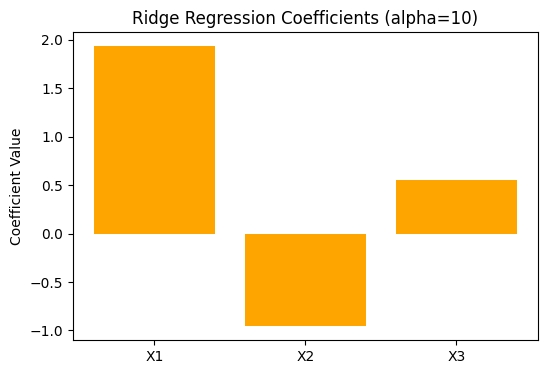

In [30]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

plt.figure(figsize=(6,4))
plt.bar(['X1','X2','X3'], ridge.coef_.flatten(), color='orange')
plt.title("Ridge Regression Coefficients (alpha=10)")
plt.ylabel("Coefficient Value")
plt.show()

**Observation:**

Ridge regression reduces extreme coefficients, mitigating multicollinearity effects.

**Step 8: Summary & Conclusion**

>Ridge Regression adds L2 penalty to control coefficient size.

>It is effective when features are correlated or dataset is high-dimensional.

>Alpha is the key hyperparameter: small → minimal regularization, large → strong shrinkage.

>Ridge often reduces variance, improving generalization without drastically increasing bias.

**Optional Extension**

>Use RidgeCV from sklearn to automatically select the best alpha via cross-validation.

>Compare Ridge vs Linear Regression on real datasets with multicollinearity (e.g., Boston Housing).